In [2]:
import os

# HUST 

In [52]:
data_folder = r"C:\Users\simon\signal_analysis\vibration_anal\vibration_analysis_nov\data\HUST bearing a practical dataset for ball bearing fault diagnosis\HUST bearing a practical dataset for ball bearing fault diagnosis\HUST bearing dataset"
mat_files = [os.path.join(data_folder, file) for file in os.listdir(data_folder) if file.endswith('.mat')]
print(mat_files)

['C:\\Users\\simon\\signal_analysis\\vibration_anal\\vibration_analysis_nov\\data\\HUST bearing a practical dataset for ball bearing fault diagnosis\\HUST bearing a practical dataset for ball bearing fault diagnosis\\HUST bearing dataset\\B500.mat', 'C:\\Users\\simon\\signal_analysis\\vibration_anal\\vibration_analysis_nov\\data\\HUST bearing a practical dataset for ball bearing fault diagnosis\\HUST bearing a practical dataset for ball bearing fault diagnosis\\HUST bearing dataset\\B502.mat', 'C:\\Users\\simon\\signal_analysis\\vibration_anal\\vibration_analysis_nov\\data\\HUST bearing a practical dataset for ball bearing fault diagnosis\\HUST bearing a practical dataset for ball bearing fault diagnosis\\HUST bearing dataset\\B504.mat', 'C:\\Users\\simon\\signal_analysis\\vibration_anal\\vibration_analysis_nov\\data\\HUST bearing a practical dataset for ball bearing fault diagnosis\\HUST bearing a practical dataset for ball bearing fault diagnosis\\HUST bearing dataset\\B600.mat', 'C:

In [53]:
import scipy.io

# Replace 'your_file.mat' with the path to your .mat file
data = scipy.io.loadmat(mat_files[1])
# data = data['DS']

# This will show you the keys, kinda like a map to your data treasure!
print(data.keys())

# To access a specific part of the data, use the key like data['key_name']
# You can plot or analyze it depending on what you're looking for


dict_keys(['__header__', '__version__', '__globals__', 'data', 'fs', 'ru_raw'])


In [56]:
print(data['data'])

[[ 2.07405579]
 [ 3.40258893]
 [ 1.63932364]
 ...
 [-0.4326923 ]
 [ 1.02223688]
 [ 0.69220379]]


In [30]:
import scipy.io
from bokeh.plotting import figure, show, output_notebook

# Extract the 'data' part and flatten it to 1D
plot_data = data['data'].flatten()
# plot_data = data['DS'].flatten()

import numpy as np

# Downsample your data. Change the value of 'n' to adjust the level of downsampling
n = 50
downsampled_x = np.arange(0, len(plot_data), n)
downsampled_y = plot_data[::n]

# Plotting the downsampled data
p = figure(title="Downsampled Vibration Data Visualization", x_axis_label='Index', y_axis_label='Vibration Value')
p.line(downsampled_x, downsampled_y, legend_label="Downsampled Vibration Data", line_width=2)
show(p)


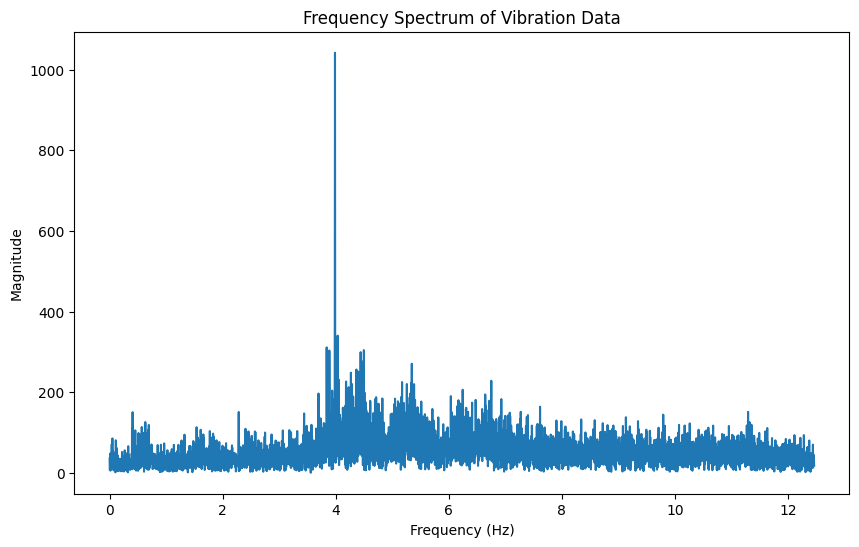

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Load your data
data = scipy.io.loadmat(mat_files[0])
vibration_data = data['data'].flatten()

# Sampling frequency 'fs' if provided, otherwise assume a default value
fs = data.get('fs', 1).flatten()[0]

# Perform FFT
fft_result = np.fft.fft(vibration_data, n=10000)

# Compute the frequencies for each FFT result
freqs = np.fft.fftfreq(len(fft_result), 1/fs)

# Get the magnitude of the FFT and corresponding frequencies (ignoring negative frequencies)
fft_magnitude = np.abs(fft_result)[:len(fft_result)//2]
positive_freqs = freqs[:len(freqs)//2]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs, fft_magnitude)
plt.title("Frequency Spectrum of Vibration Data")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()


### All files in one graph (SLOW AND UNNECESSARY)

KeyboardInterrupt: 

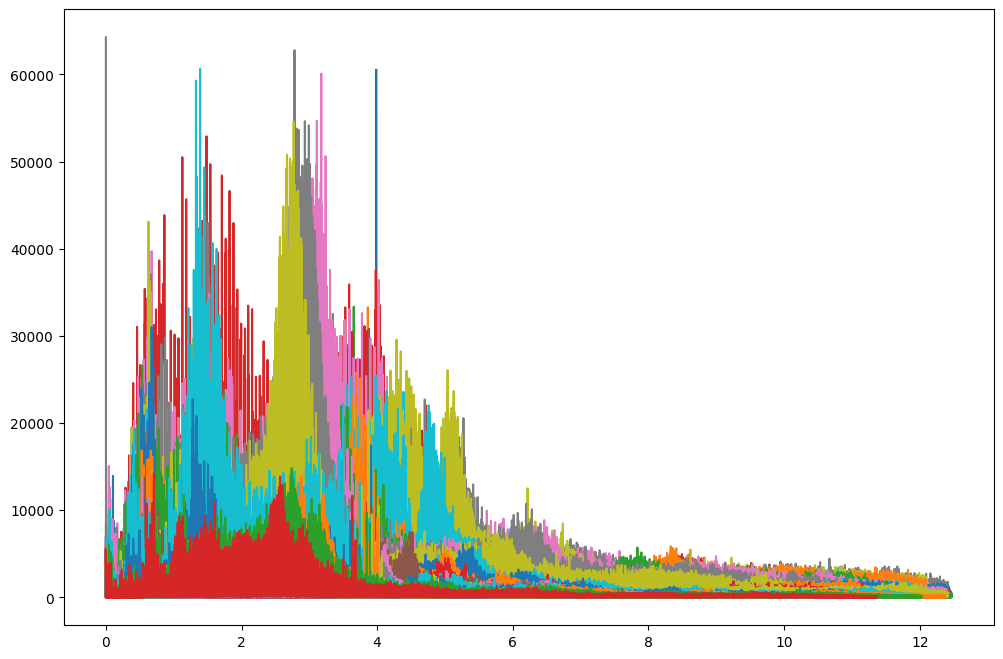

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

# Set up the plot
plt.figure(figsize=(12, 8))

# Loop through each file
for file in mat_files:
    # Load data
    data = scipy.io.loadmat(file)
    vibration_data = data['data'].flatten()

    # Perform FFT
    fft_result = np.fft.fft(vibration_data)

    # Compute frequencies
    fs = data.get('fs', 1).flatten()[0]  # Sampling frequency
    freqs = np.fft.fftfreq(len(fft_result), 1/fs)

    # Get magnitude for positive frequencies
    fft_magnitude = np.abs(fft_result)[:len(fft_result)//2]
    positive_freqs = freqs[:len(freqs)//2]

    # Plot
    plt.plot(positive_freqs, fft_magnitude, label=f'FFT of {file}')

# Add legend, title, and labels
# plt.legend()
plt.title("Frequency Spectra of Multiple Datasets")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.yscale('log')  # Optional: Logarithmic scale for better visibility

# Show the plot
plt.show()


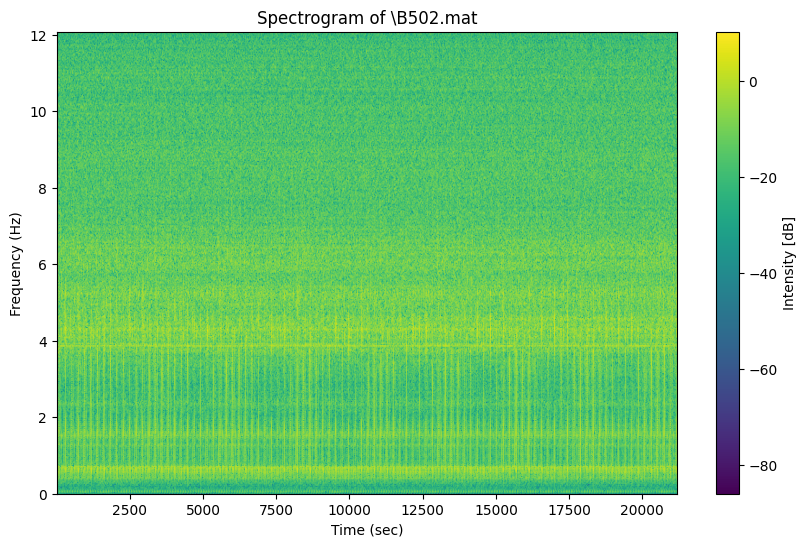

In [36]:
import matplotlib.pyplot as plt
import scipy.io

# Your list of file paths
# mat_files = ['path_to_file1.mat', 'path_to_file2.mat', ...]  # Replace with your actual file paths
mat_file = [mat_files[1]]


# Loop through each file
for file in mat_file:
    # Load data
    data = scipy.io.loadmat(file)
    vibration_data = data['data'].flatten()

    # Sampling frequency
    fs = data.get('fs', 1).flatten()[0]
    # print(data.get('ru'))

    # Set up the plot for each file
    plt.figure(figsize=(10, 6))

    # Generate spectrogram
    # NFFT and noverlap are parameters you can tweak according to your data's characteristics
    plt.specgram(vibration_data, NFFT=1024, Fs=fs, noverlap=512, scale='dB')

    # Add title and labels
    plt.title(f"Spectrogram of {file[-9:]}")
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (sec)')

    # Show the plot
    plt.colorbar(label='Intensity [dB]')
    plt.show()


# SCA

In [ ]:
import scipy.io
import numpy as np

In [38]:
data_folder = r"C:\Users\simon\signal_analysis\vibration_anal\vibration_analysis_nov\data\SCA bearing dataset\SCA bearing dataset\1"
mat_files = [os.path.join(data_folder, file) for file in os.listdir(data_folder) if file.endswith('.mat')]
print(mat_files)
SCA_data = scipy.io.loadmat(mat_files[0])
print(SCA_data.keys())

['C:\\Users\\simon\\signal_analysis\\vibration_anal\\vibration_analysis_nov\\data\\SCA bearing dataset\\SCA bearing dataset\\1\\test.mat', 'C:\\Users\\simon\\signal_analysis\\vibration_anal\\vibration_analysis_nov\\data\\SCA bearing dataset\\SCA bearing dataset\\1\\train.mat']
dict_keys(['__header__', '__version__', '__globals__', 'id', 'assetDescription', 'faultOrigin', 'faultType', 'fromDate', 'toDate', 'fixedSpeed', 'DS', 'FS'])


In [40]:
# Iterate through each key and print some basic info
for key in SCA_data.keys():
    # Skip the built-in keys that start with '__'
    if not key.startswith('__'):
        print(f"Key: {key}")
        print(f"Type: {type(SCA_data[key])}")
        if hasattr(SCA_data[key], 'shape'):
            print(f"Shape: {SCA_data[key].shape}")
        else:
            print("Not a numpy array or similar data structure.")
        print(f"First few elements: {SCA_data[key].flatten()[:5]}")  # Adjust as needed to avoid large outputs
        print("---")

Key: id
Type: <class 'numpy.ndarray'>
Shape: (1, 1)
First few elements: [1]
---
Key: assetDescription
Type: <class 'numpy.ndarray'>
Shape: (1,)
First few elements: ['Roller']
---
Key: faultOrigin
Type: <class 'numpy.ndarray'>
Shape: (1,)
First few elements: ['DS']
---
Key: faultType
Type: <class 'numpy.ndarray'>
Shape: (1, 1)
First few elements: [1]
---
Key: fromDate
Type: <class 'numpy.ndarray'>
Shape: (1,)
First few elements: ['2022-01-01T19:00:06']
---
Key: toDate
Type: <class 'numpy.ndarray'>
Shape: (1,)
First few elements: ['2022-05-10T19:00:06']
---
Key: fixedSpeed
Type: <class 'numpy.ndarray'>
Shape: (1, 1)
First few elements: [0]
---
Key: DS
Type: <class 'numpy.ndarray'>
Shape: (1, 1)
First few elements: [(array(['SKF22320 E'], dtype='<U10'), array([[(array([[0.03262641]]), array([[0.21326528]]), array([[0.5244098]]), array([[0.7488158]]))]],
       dtype=[('FTFMultiple', 'O'), ('BPFMultiple', 'O'), ('BPFOMultiple', 'O'), ('BPFIMultiple', 'O')]), array(['m/s^2'], dtype='<U5'), 

In [42]:
# Access the 'DS' key
ds_data = data['DS']

# Print the structure of 'DS'
print("DS Data Type:", type(ds_data))
print("DS Shape:", ds_data.shape)

# Try to access the first element to understand its structure
first_element = ds_data[0, 0]
print("First Element Type:", type(first_element))

# If it's a structured array, print its fields
if hasattr(first_element, 'dtype'):
    print("Fields in DS:", first_element.dtype.names)

# Inspect the first few elements of each field, handling 1-dimensional arrays
for field in first_element.dtype.names:
    print(f"---\nField: {field}")
    field_content = first_element[field]
    if field_content.ndim > 1:
        # For multi-dimensional arrays
        print("Content:", field_content[0, 0])
    else:
        # For 1-dimensional arrays
        print("Content:", field_content[0])

DS Data Type: <class 'numpy.ndarray'>
DS Shape: (1, 1)
First Element Type: <class 'numpy.void'>
Fields in DS: ('assetName', 'faultFrequencies', 'unit', 'rawData', 'samplingRate', 'RPM', 'time', 'label')
---
Field: assetName
Content: SKF22320 E
---
Field: faultFrequencies
Content: (array([[0.03262641]]), array([[0.21326528]]), array([[0.5244098]]), array([[0.7488158]]))
---
Field: unit
Content: m/s^2
---
Field: rawData
Content: 0.0559824221
---
Field: samplingRate
Content: 640.0
---
Field: RPM
Content: 1086.87769
---
Field: time
Content: 2022-05-13T15:01:07.17
---
Field: label
Content: 0


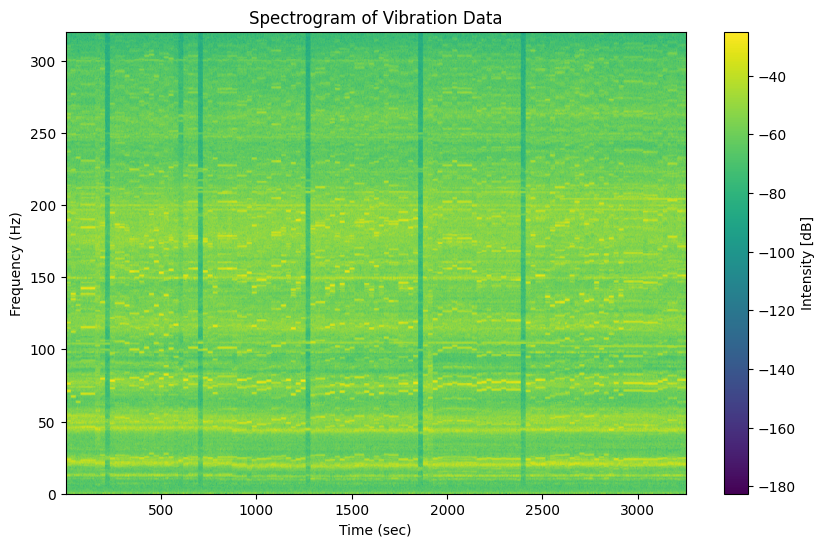

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting the rawData
raw_data = ds_data['rawData'][0, 0].flatten()  # Flattening in case it's not 1D

# Extract the first value of samplingRate as the rate
sampling_rate = float(sampling_rate_data[0, 0])

# Set up the plot
plt.figure(figsize=(10, 6))

# Generate spectrogram
# NFFT and noverlap are parameters you can tweak according to your data's characteristics
plt.specgram(raw_data, NFFT=1024, Fs=sampling_rate, noverlap=512, scale='dB')

# Add title and labels
plt.title("Spectrogram of Vibration Data")
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')

# Show the plot
plt.colorbar(label='Intensity [dB]')
plt.show()


In [49]:
print(ds_data['label'])

[[array([[ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])  ]]


In [47]:
# Attempting to inspect the samplingRate structure
sampling_rate_data = ds_data['samplingRate'][0, 0]
print("Sampling Rate Data Type:", type(sampling_rate_data))
print("Sampling Rate Data:", sampling_rate_data)

# If it's an array, let's print its shape and first few elements
if isinstance(sampling_rate_data, np.ndarray):
    print("Sampling Rate Array Shape:", sampling_rate_data.shape)
    print("First few elements of Sampling Rate Array:", sampling_rate_data.flatten()[:5])


Sampling Rate Data Type: <class 'numpy.ndarray'>
Sampling Rate Data: [[640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640.
  640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640.
  640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640.
  640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640.
  640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640.
  640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640.
  640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640.
  640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640.
  640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640. 640.
  640.]]
Sampling Rate Array Shape: (1, 127)
First few elements of Sampling Rate Array: [640. 640. 640. 640. 640.]
